# Exploration of Flight Data
## by Parida

## Preliminary Wrangling

> This dataset reports flights in the United States for 2008, it consists of various columns related to delay and cancellation of flights. 
> Data source link: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7


In [33]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.api.types import CategoricalDtype

%matplotlib inline

In [34]:
#Loading the dataset
flights_data = pd.read_csv('2008.csv')

In [35]:
flights_data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [36]:
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [37]:
flights_data.Month.value_counts()

3    616090
1    605765
4    598126
2    569236
Name: Month, dtype: int64

In [38]:
# filter the dataframe for January only
flights_data = flights_data [ flights_data.Month == 1 ]
flights_data.Month.value_counts()

1    605765
Name: Month, dtype: int64

In [39]:
# view the missing values
flights_data.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime               17308
CRSDepTime                0
ArrTime               18635
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                9952
ActualElapsedTime     18635
CRSElapsedTime          106
AirTime               18635
ArrDelay              18635
DepDelay              17308
Origin                    0
Dest                      0
Distance                  0
TaxiIn                18635
TaxiOut               17308
Cancelled                 0
CancellationCode     588457
Diverted                  0
CarrierDelay         456958
WeatherDelay         456958
NASDelay             456958
SecurityDelay        456958
LateAircraftDelay    456958
dtype: int64

In [40]:
flights_data.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,605765.0,605765.0,605765.000000,605765.000000,588457.000000,605765.000000,587130.000000,605765.000000,605765.000000,587130.000000,...,605765.000000,587130.000000,588457.000000,605765.000000,605765.000000,148807.000000,148807.000000,148807.000000,148807.000000,148807.000000
mean,2008.0,1.0,15.908885,3.848879,1341.313469,1330.337020,1491.156790,1499.829660,2229.870511,128.296963,...,720.257461,6.888546,16.797139,0.028572,0.002191,15.832279,2.888493,16.277326,0.086770,21.140054
std,0.0,0.0,8.994594,1.923451,477.113017,463.361168,502.776793,480.073842,1959.893778,70.263954,...,557.607215,5.014824,10.969598,0.166601,0.046753,39.000363,19.491878,31.697242,1.603085,38.808331
min,2008.0,1.0,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,15.000000,...,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.0,8.000000,2.000000,933.000000,930.000000,1116.000000,1120.000000,614.000000,77.000000,...,321.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,1.0,16.000000,4.000000,1333.000000,1325.000000,1520.000000,1522.000000,1551.000000,111.000000,...,576.000000,6.000000,14.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
75%,2008.0,1.0,24.000000,5.000000,1731.000000,1719.000000,1914.000000,1910.000000,3669.000000,159.000000,...,951.000000,8.000000,20.000000,0.000000,0.000000,17.000000,0.000000,20.000000,0.000000,27.000000
max,2008.0,1.0,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,9202.000000,693.000000,...,4962.000000,213.000000,383.000000,1.000000,1.000000,1158.000000,1049.000000,1357.000000,136.000000,897.000000


### The structure of the dataset

- The dataset has  238927 rows and 29 columns. 
- Since the data only consists of 4 months of data in 2008, to make my analysis more consistent,  I decided to focus on the one month, January. 

### The main features of interest in the dataset

**I will be focusing on analyzing the following features contribute to the flights' cancellation and delays, such as:**

- What were the most cancellation reasons? 
- Which day of the week had the most proportion of flight delays?
- How the distance affect flight delays?
- What is the different effect of ArrDelay, CarrierDelay, LateAircraftDelay, NASDelay, and WeatherDelay? 


### The features to investigate in the dataset

**I expect that the features such as weather, distance, weekend, and carrier affect the flight cancellation and delays.**

## Univariate Exploration

### Cancellation Reasons

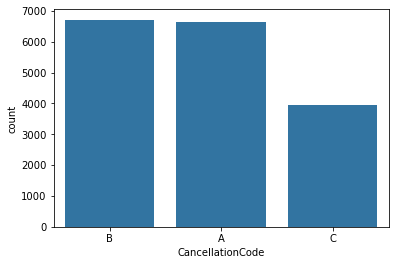

In [41]:
#create a vertical bar chart with seaborn
base_color = sb.color_palette()[0]

#order the bar chart
freq = flights_data['CancellationCode'].value_counts()
gen_order = freq.index

sb.countplot(data = flights_data, x = 'CancellationCode', color = base_color, order=gen_order);

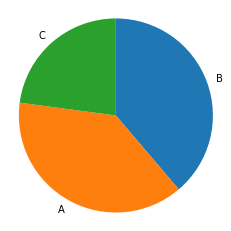

In [42]:
# plot a pie chart
sorted_counts = flights_data['CancellationCode'].value_counts()

plt.pie(sorted_counts, labels= sorted_counts.index, startangle = 90, counterclock = False);

plt.axis('square');


> Accroding to the veriable instruction, A = carrier, B = weather, C = national aviation system(NAS), D = security, so carrier and weather are the most reason for cancellation, and there is no cancellation because of security. 

### Day of Week

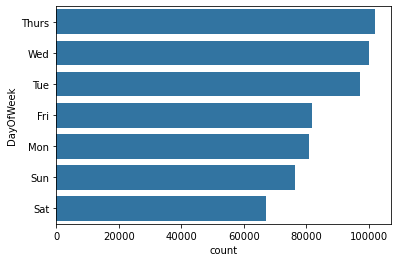

In [45]:
#order the bar chart
day_counts = flights_data['DayOfWeek'].value_counts()
day_order = day_counts.index

mapping = {1:'Mon', 2:'Tue', 3:'Wed', 4:'Thurs', 5:'Fri', 6:'Sat', 7:'Sun'}
df = flights_data['DayOfWeek'].replace(mapping)

#plot the bar chart in the decreasing order of the frequency of the 'DayOfWeek'
sb.countplot(data=flights_data, y='DayOfWeek', color=base_color, order=day_order);


In [46]:
#return the sum of all not-null values in 'DayOfWeek' column
n_flights_data = flights_data['DayOfWeek'].value_counts().sum()

day_order = day_counts.index


#return the highest frequency in the 'DayOfWeek' column
max_day_count = day_counts.iloc[0]

#return the maximum proportion
max_prop = max_day_count/n_flights_data
print(max_prop)

0.1684531130058686


In [47]:
#create an array of evenly spaced proportioned values
tick_props = np.arange(0,max_prop,0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16])

In [48]:
#create a list of string values that can be used as tick labels
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

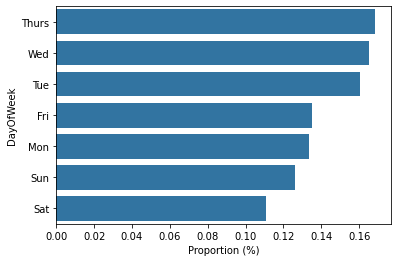

In [49]:
# plot bar chart
sb.countplot(data = flights_data, y='DayOfWeek', color=base_color, order = day_order)
#change the tick location and labels 
plt.xticks(tick_props * n_flights_data, tick_names)
plt.xlabel('Proportion (%)');

> Interestingly, middle of the week (Tuesday, Wednesday, Thursday) have more proportion of flights delay compared to Weekend (Saturday, Sunday).

### Distance

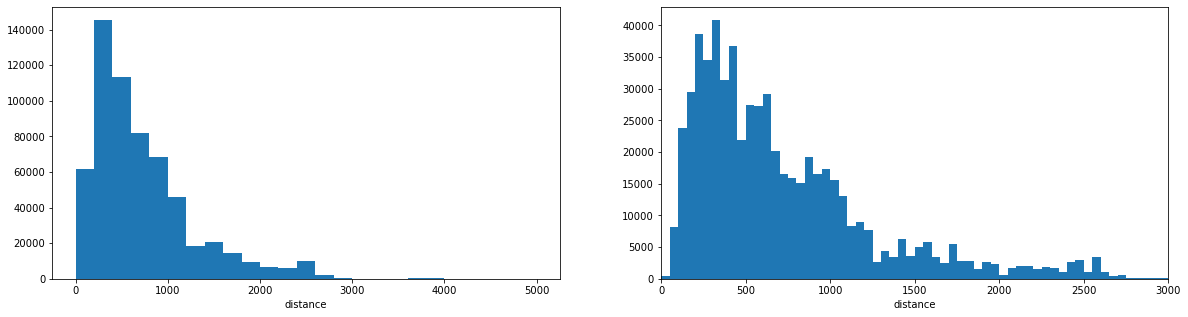

In [16]:
# plot two histograms side-by-side 
# resize the chart, set a larger figure size for subplots
plt.figure(figsize= [20,5])

# histogram on left, with large bin size 
plt.subplot(1,2,1)
bins = np.arange(0, flights_data['Distance'].max()+200, 200)
plt.hist(data = flights_data, x='Distance', bins=bins)
plt.xlabel("distance");

# histogram on right, with small bin size 
plt.subplot(1,2,2)
bins = np.arange(0, flights_data['Distance'].max()+50, 50)
plt.hist(data = flights_data, x='Distance', bins=bins)
plt.xlabel("distance")
#from descriptive statistics, 75% distance is 951, max is 4962, means there is outlier, so i will focus on data < 3000
plt.xlim(0,3000);

In [17]:
#lots of point with low value, with a very long tail of data points with large values
# scale the x-axis to log_type, and cange the axis limit 
np. log10(flights_data['Distance'].describe())

count    5.782304
mean     2.857488
std      2.746328
min      1.380211
25%      2.506505
50%      2.760422
75%      2.978181
max      3.695657
Name: Distance, dtype: float64

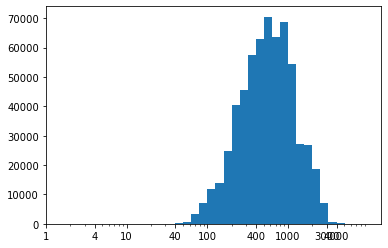

In [18]:
#axis transformation
# bin size
bins = 10 ** np.arange(1, 4+0.1, 0.1)

# generate the x-ticks 
ticks = [1, 4, 10, 40, 100, 400, 1000, 3000, 4000]
# convert ticks into string values, to be displayed along the x-axis
labels = ['{}'.format(v) for v in ticks]

#plt histogram
plt.hist(data=flights_data, x='Distance', bins=bins)
plt.xscale('log')

#apply x-ticks 
plt.xticks(ticks, labels);


> We can see that the distance distribution is right-skewed. 
> When plotted on a log-scale, the distance distribution looks roughly normal distribution. The flights become limited when the distance increases(more than 3000).

## Bivariate Exploration

### Arrival Delay and Departure Delay 

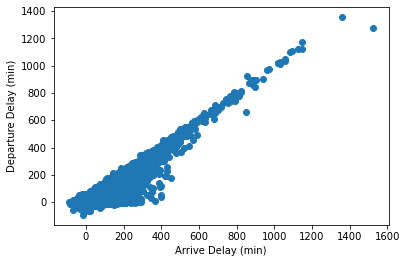

In [19]:
# scatter plot with matplotlib
plt.scatter(data = flights_data, x='ArrDelay', y='DepDelay')
plt.xlabel('Arrive Delay (min)')
plt.ylabel('Departure Delay (min)');


> The scatter plot shows a strong positive correlation between arrival delay and departure delay.

### Carrier and Departure Delay

In [20]:
carriers_sorted = sorted(flights_data.UniqueCarrier.unique())
carriers_sorted

['9E',
 'AA',
 'AQ',
 'AS',
 'B6',
 'CO',
 'DL',
 'EV',
 'F9',
 'FL',
 'HA',
 'MQ',
 'NW',
 'OH',
 'OO',
 'UA',
 'US',
 'WN',
 'XE',
 'YV']

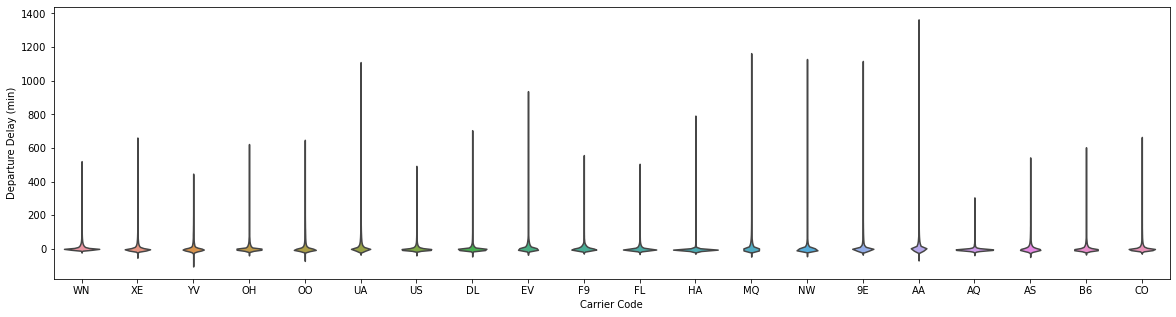

In [21]:
#Violin plot
from pandas.api.types import CategoricalDtype

plt.figure(figsize= [20,5])

sb.violinplot(data=flights_data, x='UniqueCarrier', y='DepDelay', inner=None);
plt.xlabel('Carrier Code')
plt.ylabel('Departure Delay (min)');

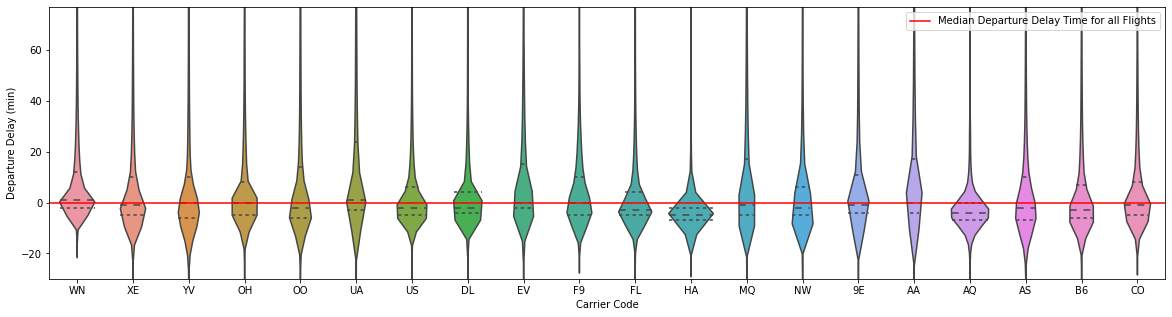

In [22]:
# there are a lot of outliers, so i will zoom in on the bulk of data to see the difference 
plt.figure(figsize= [20,5])

sb.violinplot(data=flights_data, x='UniqueCarrier', y='DepDelay', inner='quartile')
plt.ylim(-30,flights_data.DepDelay.quantile(0.95));

#add a horizontal line for the median departure time for all flights 
plt.axhline(flights_data.DepDelay.median(), color='red', label="Median Departure Delay Time for all Flights")
plt.legend()
plt.xlabel('Carrier Code')
plt.ylabel('Departure Delay (min)');

> We can see that all carriers have a lot of outliers, which means carrirs have a severe delay problem that over 1000 minuts, such as American Airline(AA), Envoy Airline(MQ), United Airline(UA) and Endeavor Airline(9E).
> 
> After zoom in, we can see most of airlines departure on time or departure delay less than 20 minutes. Some even departure much earlier than scheduled departure time, such as 9 Air Co(AQ) and Hawaiian Airlines(HA).

### Carrier and Arrival Delay

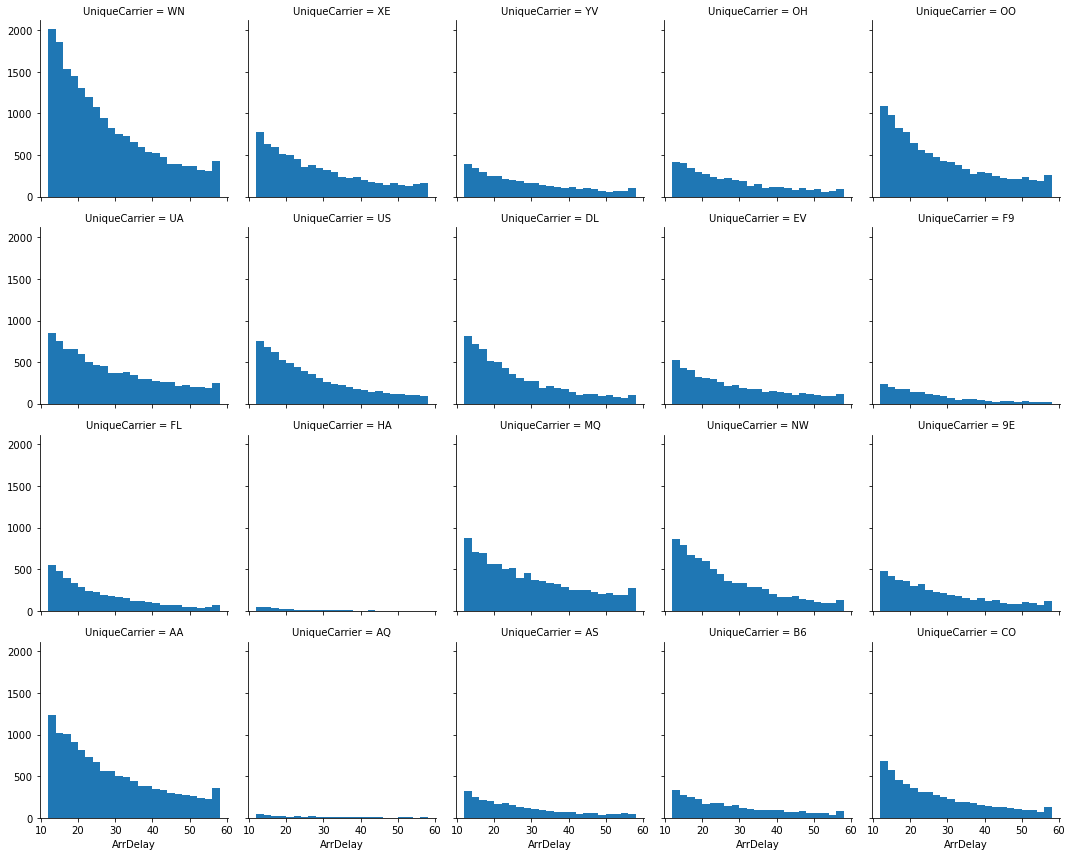

In [23]:
#plot seaborn's Facetgrid
bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = flights_data, col = 'UniqueCarrier', col_wrap=5);
g.map(plt.hist, "ArrDelay", bins=bins);

> We can see that most of the carrier's Arrival delay is right-skewed.
>
> It is easy to notice that Hawaiian Airlines(HA) and 9 Air Co (AQ) are the two flights with little arrival delays compared to other carriers.


## Multivariate Exploration

### Distance with Arrival and Departure Delays

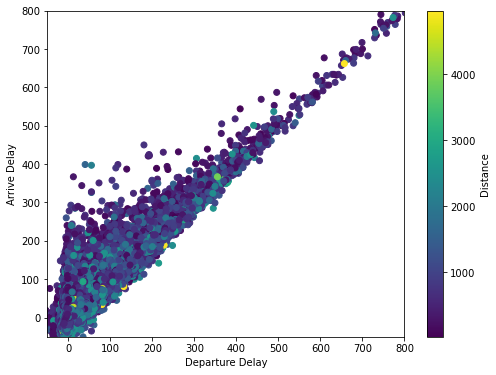

In [24]:
# plot a scatter plot 
plt.figure(figsize=[8,6])
plt.scatter(data= flights_data, x='DepDelay', y='ArrDelay', c='Distance');
plt.colorbar(label='Distance')
plt.xlim(-50,800)
plt.ylim(-50,800)
plt.xlabel('Departure Delay')
plt.ylabel('Arrive Delay');

> we can see that with the distance increase, arrival delays and departure delays increase simultaneously.

### Day of week with Weather Delay and Arrival Delay

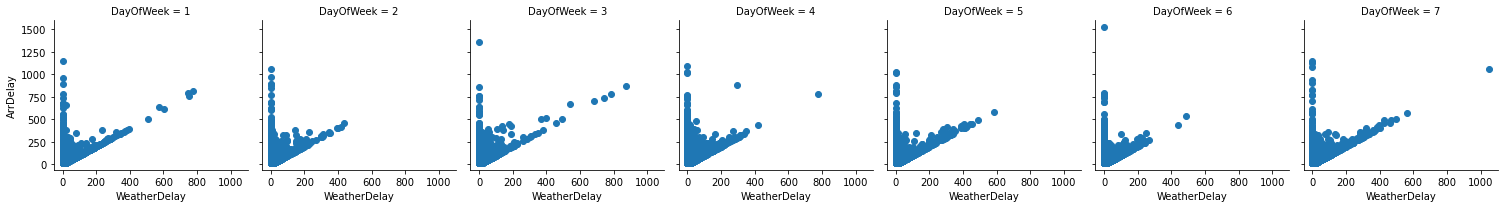

In [25]:
# GacetGrid 
g = sb.FacetGrid(data=flights_data, col='DayOfWeek',
                margin_titles= True);

g.map(plt.scatter, 'WeatherDelay','ArrDelay');

> We can see that with the Weather delay increase, the Arrival delay increase as well. It's a postive correlation. 
> 
> Wednesday has the most arrival and departure delays. It is aligned with the former findings(the middle of week has more proporation of flights delays).

### Arrival, Departure, Carrier, Weather Delays

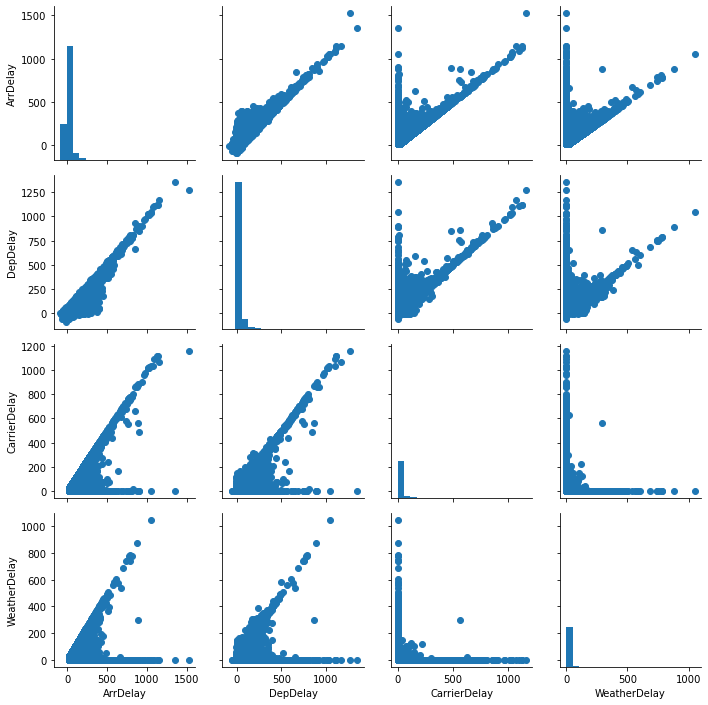

In [26]:
numeric_vars = ['ArrDelay','DepDelay','CarrierDelay','WeatherDelay']
g = sb.PairGrid(data = flights_data, vars = numeric_vars) 
g = g.map_diag(plt.hist, bins = 20); 
g.map_offdiag(plt.scatter);


> This plot shows that the relation among different types of delays. 
> We can see that Carrier delays have the most significant effect on departure delays. 